In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

Using TensorFlow backend.
c:\users\cuet\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\cuet\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\cuet\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [2]:
IMG_WIDTH = 125
IMG_HEIGHT = 50
MODEL_NAME = 'CC.h5'
model=load_model(MODEL_NAME)
classes =['2','5','10', '20', '50', '100', '500', '1000']

In [3]:

def live():
    webcam = cv2.VideoCapture(0)
    while True:
        check, frame = webcam.read()
        frame = frame[70:-70, :]
        key = cv2.waitKey(1)
        img = cv2.resize(frame, (IMG_WIDTH, IMG_HEIGHT))
        img = img.reshape(-1, IMG_WIDTH, IMG_HEIGHT, 3)
        pred = model.predict(img)
        if(np.max(pred)<0.8):
            name=' Unknown'
            
        else:
            name=classes[np.argmax(pred)]+' Taka Note'
            
        cv2.putText(frame,name,(100,100),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255),5)
        cv2.imshow('frame', frame)
        if key == ord('q'):
            webcam.release()
            cv2.destroyAllWindows()
            break
            
            
def capture():
    webcam = cv2.VideoCapture(0)
    while True:
        check, frame = webcam.read()
        frame = frame[90:-90, :]
        key = cv2.waitKey(1)
        cv2.imshow('frame', frame)
        if key==ord('s'):
            cv2.imwrite('sample.jpg',frame)
        if key == ord('q'):
            webcam.release()
            cv2.destroyAllWindows()
            break
    load_predict('sample.jpg')
 

def load_predict(path):
    img = cv2.imread(path)
    plt.imshow(img)
    plt.show()
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    img = img.reshape(-1, IMG_WIDTH, IMG_HEIGHT, 3)
    pred = model.predict(img)
    print(pred)
    print(np.argmax(pred))
    print(classes[np.argmax(pred)]+' Taka Note')


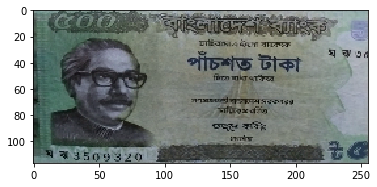

[[1.4085833e-26 1.1942661e-15 2.3782580e-20 2.0116062e-09 3.2256511e-07
  6.6523538e-09 9.9999964e-01 1.7447801e-08]]
6
500 Taka Note


In [4]:
path='H:/Currency Classifier/dataset/500 (60).png'
load_predict(path)


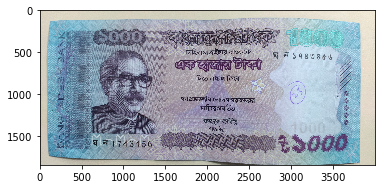

[[4.4598332e-19 2.1237529e-16 1.3134524e-08 3.1009651e-16 3.0341727e-09
  4.8916407e-16 1.8109346e-12 1.0000000e+00]]
7
1000 Taka Note


In [5]:

load_predict('H:/Currency Classifier/Test/sample (8).jpg')

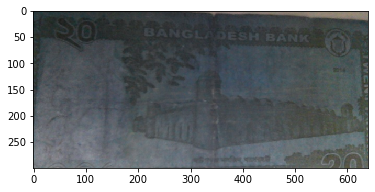

[[1.5426603e-04 9.4418651e-01 7.1720865e-07 4.5543067e-02 9.9641839e-03
  2.9476588e-08 7.5997705e-05 7.5156953e-05]]
1
5 Taka Note


In [27]:
capture()